- Load modules and warning declaration

In [15]:
import warnings
warnings.filterwarnings("ignore")

In [16]:
import pandas as pd
import os
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MaxAbsScaler
import matplotlib.pyplot as plt

- Auxtiliar functions

In [17]:
def scaler_data(data):
    scaler = MaxAbsScaler()
    data_transform = scaler.fit_transform(data)
    df_transform = pd.DataFrame(data=data_transform, columns=["x", "y"])
    return df_transform["y"].values

- Loading raw data

In [18]:
path_data = "raw_data/"
list_docs = os.listdir(path_data)

In [19]:
list_df = []
for element in list_docs:
    df = pd.read_csv(f"{path_data}{element}", sep="   ")
    df.columns = ["Wavenumber", "RRI"]
    df["RRI-MAS"] = scaler_data(df)
    df["RRI-Log"] = np.log(df["RRI"].values)
    df["source"] = element.replace("spectrum_curve_", "").split(".")[0]
    df["Is_mutant"] = "Mutant" if "MD" in element else "Wild type"
    list_df.append(df)

full_data = pd.concat(list_df, axis=0)

In [20]:
full_data = full_data.reset_index()
full_data = full_data.drop(columns=["index"])

In [25]:
wt_data = full_data[full_data["Is_mutant"] == "Wild type"]
wt_data

,Wavenumber,RRI,RRI-MAS,RRI-Log,source,Is_mutant
332,3998.66622,0.007804,0.000085,-4.853092,WT_310 1,Wild type
333,3997.33244,0.007859,0.000086,-4.846055,WT_310 1,Wild type
334,3995.99867,0.007915,0.000087,-4.838951,WT_310 1,Wild type
335,3994.66489,0.007972,0.000087,-4.831779,WT_310 1,Wild type
336,3993.33111,0.008030,0.000088,-4.824538,WT_310 1,Wild type
...,...,...,...,...,...,...
33485,3755.09490,73.546800,0.063613,4.297922,spectrum_line_WT_310,Wild type
33486,3755.09490,0.000000,0.000000,-inf,spectrum_line_WT_310,Wild type
33487,3852.14070,0.000000,0.000000,-inf,spectrum_line_WT_310,Wild type
33488,3852.14070,15.524200,0.013427,2.742400,spectrum_line_WT_310,Wild type


In [21]:
full_data["Is_mutant"].value_counts()

Is_mutant
Mutant       29979
Wild type     6842
Name: count, dtype: int64

In [22]:
full_data.head()

,Wavenumber,RRI,RRI-MAS,RRI-Log,source,Is_mutant
0,16.6637,0.6224,0.003937,-0.474172,spectrum_line_MD2_28,Mutant
1,16.6637,0.0000,0.000000,-inf,spectrum_line_MD2_28,Mutant
2,39.0721,0.0000,0.000000,-inf,spectrum_line_MD2_28,Mutant
3,39.0721,0.0900,0.000569,-2.407946,spectrum_line_MD2_28,Mutant
4,39.0721,0.0000,0.000000,-inf,spectrum_line_MD2_28,Mutant


In [23]:
full_data["Is_mutant"].value_counts()

Is_mutant
Mutant       29979
Wild type     6842
Name: count, dtype: int64

- Plot raw data

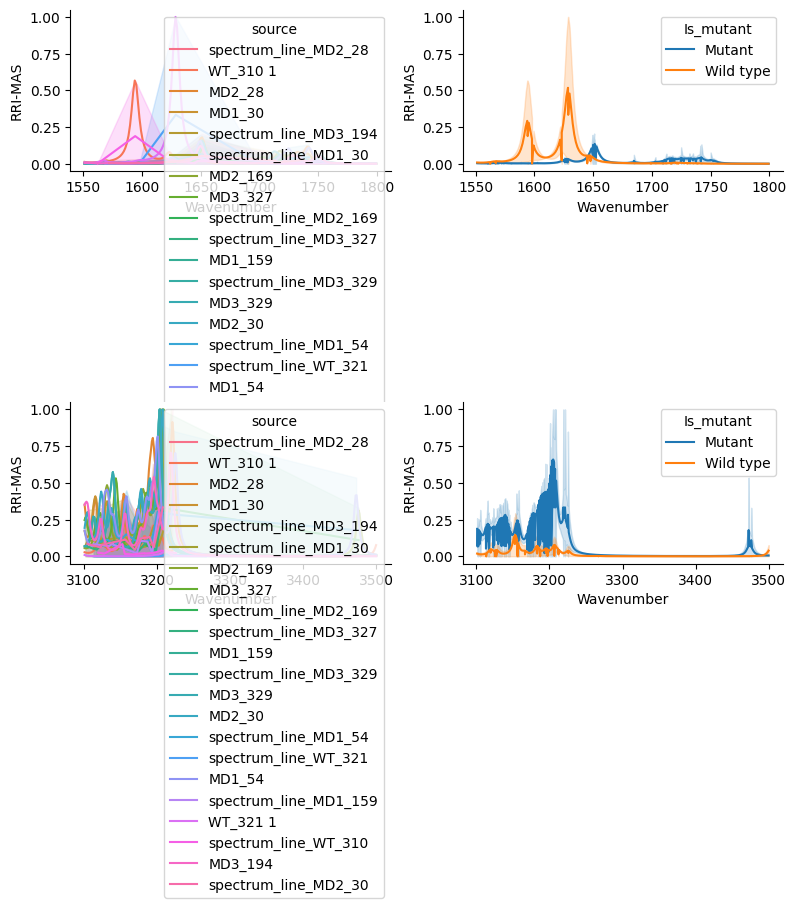

In [24]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

df_filter_low = full_data[(full_data["Wavenumber"]>=1550) & (full_data["Wavenumber"]<=1800)]
sns.lineplot(ax=axs[0][0], data=df_filter_low, x="Wavenumber", y="RRI-MAS", hue="source")
sns.lineplot(ax=axs[0][1], data=df_filter_low, x="Wavenumber", y="RRI-MAS", hue="Is_mutant")

df_filter_high = full_data[(full_data["Wavenumber"]>=3100) & (full_data["Wavenumber"]<=3500)]
sns.lineplot(ax=axs[1][0], data=df_filter_high, x="Wavenumber", y="RRI-MAS", hue="source")
sns.lineplot(ax=axs[1][1], data=df_filter_high, x="Wavenumber", y="RRI-MAS", hue="Is_mutant")

sns.despine()
plt.tight_layout()